<a href="https://colab.research.google.com/github/tyuyamato/ML_training/blob/main/%E9%87%91%E5%AD%90%E6%9C%AC_4%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.1

In [1]:
import matplotlib.figure as figure  # 図の調整に使用
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('beer_consumption.csv', index_col=0)

In [2]:
dataset.head()

,y:beer_consumption[glasses],x:highest_temperature[C]
sample_1,10,22.1
sample_2,12,25.2
sample_3,13,27.1
sample_4,14,30.0
sample_5,16,33.3


In [3]:
# モデル構築 1. データ分割
y = dataset.iloc[:, 0]  # 目的変数
x = dataset.iloc[:, 1:]  # 説明変数

In [4]:
display(y)

sample_1    10
sample_2    12
sample_3    13
sample_4    14
sample_5    16
Name: y:beer_consumption[glasses], dtype: int64

In [5]:
display(x)

,x:highest_temperature[C]
sample_1,22.1
sample_2,25.2
sample_3,27.1
sample_4,30.0
sample_5,33.3


In [6]:
# モデル構築 2. オートスケーリング
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = (x - x.mean()) / x.std()

In [7]:
# モデル構築 3. 最小二乗法による線形単回帰分析による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

LinearRegression()

In [9]:
# モデル構築 3. 最小二乗法による線形単回帰分析による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

x_new = dataset.iloc[:, 1:]  # 今回はモデル構築に用いたデータセットと同じデータセットの y を推定します

# 新しいデータの推定 1. モデル構築用のデータを用いたオートスケーリング
autoscaled_x_new = (x_new - x.mean()) / x.std()

# 新しいデータの推定 2. 推定
autoscaled_estimated_y_new = model.predict(autoscaled_x_new)  # y の推定
# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = autoscaled_estimated_y_new * y.std() + y.mean()
estimated_y_new = pd.DataFrame(estimated_y_new, index=dataset.index,
                               columns=['estimated_y'])  # Pandas の DataFrame 型に変換。行の名前・列の名前も設定
display(x_new)
display(estimated_y_new)

,x:highest_temperature[C]
sample_1,22.1
sample_2,25.2
sample_3,27.1
sample_4,30.0
sample_5,33.3


,estimated_y
sample_1,10.195726
sample_2,11.793750
sample_3,12.773184
sample_4,14.268109
sample_5,15.969232


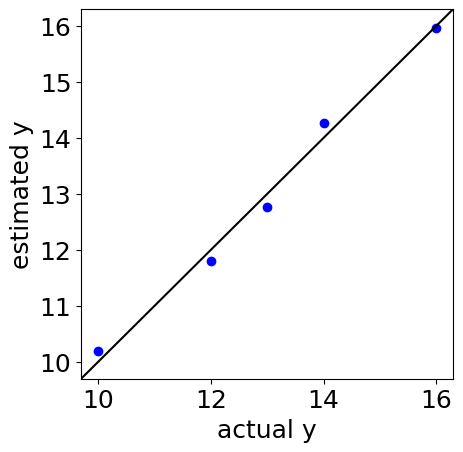

In [10]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=figure.figaspect(1))  # 図の形を正方形に
plt.scatter(y, estimated_y_new.iloc[:, 0], c='blue')  # 実測値 vs. 推定値プロット
y_max = max(y.max(), estimated_y_new.iloc[:, 0].max())  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(y.min(), estimated_y_new.iloc[:, 0].min())  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
         [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-')  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # y 軸の範囲の設定
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # x 軸の範囲の設定
plt.xlabel('actual y')  # x 軸の名前
plt.ylabel('estimated y')  # y 軸の名前
plt.show()  # 以上の設定で描画


In [11]:
# 標準回帰係数、傾き、y 切片の表示
print('標準回帰係数 :', model.coef_[0])
print('傾き :', model.coef_[0] * y.std() / x.std()[0])
print('y 切片 :', y.mean() - model.coef_[0] * x.mean()[0] * y.std() / x.std()[0])


標準回帰係数 : 0.9948587161567376
傾き : 0.5154915964130378
y 切片 : -1.1966385652150606


4.2

In [13]:
import matplotlib.figure as figure
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('boston.csv', index_col=0)

# モデル構築 1. データ分割
y = dataset.iloc[:, 0]  # 目的変数
x = dataset.iloc[:, 1:]  # 説明変数

In [14]:
dataset.head

<bound method NDFrame.head of             MEDV     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
sample_1    24.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
sample_2    21.6  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
sample_3    34.7  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
sample_4    33.4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
sample_5    36.2  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
...          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
sample_502  22.4  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
sample_503  20.6  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
sample_504  23.9  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
sample_505  22.0  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
sample_506  11.9  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  

In [16]:
display(dataset)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
sample_1,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
sample_2,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
sample_3,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
sample_4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
sample_5,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_502,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
sample_503,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
sample_504,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
sample_505,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [17]:
# モデル構築 2. オートスケーリング
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = (x - x.mean()) / x.std()

# モデル構築 3. 最小二乗法による線形単回帰分析による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

LinearRegression()

In [19]:
x_new = dataset.iloc[:, 1:]  # 今回はモデル構築に用いたデータセットと同じデータセットの y を推定します
display(x_new)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
sample_1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
sample_2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
sample_3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
sample_4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
sample_5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
sample_503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
sample_504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
sample_505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [20]:
# 新しいデータの推定 1. モデル構築用のデータを用いたオートスケーリング
autoscaled_x_new = (x_new - x.mean()) / x.std()

# 新しいデータの推定 2. 推定
autoscaled_estimated_y_new = model.predict(autoscaled_x_new)  # y の推定

# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = autoscaled_estimated_y_new * y.std() + y.mean()
estimated_y_new = pd.DataFrame(estimated_y_new, index=dataset.index, columns=['estimated_y'])
display(estimated_y_new)

,estimated_y
sample_1,30.003843
sample_2,25.025562
sample_3,30.567597
sample_4,28.607036
sample_5,27.943524
...,...
sample_502,23.533341
sample_503,22.375719
sample_504,27.627426
sample_505,26.127967


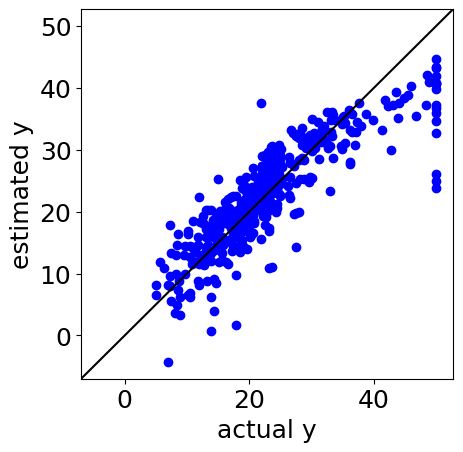

In [21]:
# 実測値 vs. 推定値のプロット
plt.rcParams['font.size'] = 18
plt.figure(figsize=figure.figaspect(1))  # 図の形を正方形に
plt.scatter(y, estimated_y_new.iloc[:, 0], c='blue')  # 実測値 vs. 推定値プロット
y_max = max(y.max(), estimated_y_new.iloc[:, 0].max())  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(y.min(), estimated_y_new.iloc[:, 0].min())  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
         [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-')  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # y 軸の範囲の設定
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # x 軸の範囲の設定
plt.xlabel('actual y')  # x 軸の名前
plt.ylabel('estimated y')  # y 軸の名前
plt.show()  # 以上の設定で描画

In [22]:
# 標準回帰係数
standard_regression_coefficients = pd.DataFrame(model.coef_)  # Pandas の DataFrame 型に変換
standard_regression_coefficients.index = x.columns  # 説明変数に対応する名前を、元のデータセットにおける説明変数の名前に
standard_regression_coefficients.columns = ['standard_regression_coefficients']  # 列名を変更
display(standard_regression_coefficients)

,standard_regression_coefficients
CRIM,-0.101017
ZN,0.117715
INDUS,0.015335
CHAS,0.074199
NOX,-0.223848
RM,0.291056
AGE,0.002119
DIS,-0.337836
RAD,0.289749
TAX,-0.226032


4.3